In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymc3 as pm
import theano
import numpy as np

np.random.seed(42)
pm.set_tt_rng(42)

In [2]:
w = pm.floatX([.2, .8])
mu = pm.floatX([-.3, .5])
sd = pm.floatX([.1, .1])

with pm.Model() as model:
    x = pm.NormalMixture('x', w=w, mu=mu, sd=sd, dtype=theano.config.floatX)
    x2 = x ** 2
    sin_x = pm.math.sin(x)

In [6]:
with model:
    mean_field = pm.fit(method='advi')

Average Loss = 2.2413: 100%|██████████| 10000/10000 [00:05<00:00, 1758.69it/s]
Finished [100%]: Average Loss = 2.2687


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efeadcc1780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7efebc763e48>], dtype=object)

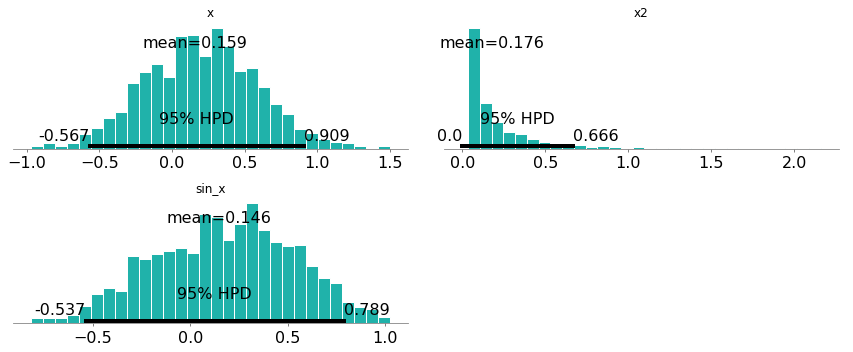

In [7]:
pm.plot_posterior(mean_field.sample(1000), color='LightSeaGreen')

In [8]:
from pymc3.variational.callbacks import CheckParametersConvergence

with model:
    mean_field = pm.fit(method='advi', callbacks=[CheckParametersConvergence()])

Average Loss = 2.2559: 100%|██████████| 10000/10000 [00:06<00:00, 1530.80it/s]
Finished [100%]: Average Loss = 2.2763


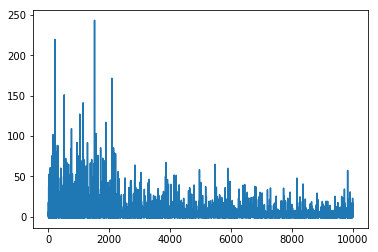

In [9]:
plt.plot(mean_field.hist);

In [10]:
with model:
    mean_field = pm.fit(method='advi', callbacks=[pm.callbacks.CheckParametersConvergence(diff='absolute')])

Average Loss = 3.145:  45%|████▌     | 4531/10000 [00:03<00:03, 1449.90it/s] 
Convergence archived at 4700
Interrupted at 4,699 [46%]: Average Loss = 4.7996


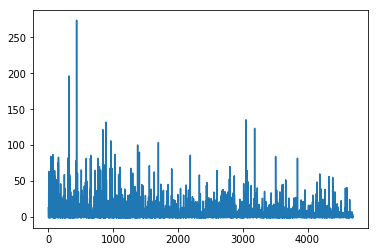

In [11]:
plt.plot(mean_field.hist);